In [27]:
import folium
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

In [26]:
print(plt.rcParams['font.family'])
print(mpl.get_configdir())
print(mpl.get_cachedir())
print(mpl.matplotlib_fname())

['sans-serif']
C:\Users\813034\.matplotlib
C:\Users\813034\.matplotlib
C:\Users\813034\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [38]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(len(fm.findSystemFonts(fontpaths=None, fontext='ttf')))

461


In [45]:
font_list_win = fm.win32InstalledFonts()
print(len(fm.win32InstalledFonts()))
print(fm.win32FontDirectory())

233
C:\Windows\Fonts


In [39]:
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))

461


In [64]:
path = 'C:/Users/813034/Downloads/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=25)

In [3]:
df = pd.read_csv("RocketPunch_ing01.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303 entries, 0 to 2302
Data columns (total 11 columns):
index            2303 non-null int64
name             2303 non-null object
url              2303 non-null object
date_found       2303 non-null object
number_people    2303 non-null object
location         2303 non-null object
series           2303 non-null object
number_invest    2303 non-null object
address          2303 non-null object
axis_x           2303 non-null object
axis_y           2303 non-null object
dtypes: int64(1), object(10)
memory usage: 108.0+ KB


In [14]:
df.head(1)

,index,name,url,date_found,number_people,location,series,number_invest,address,axis_x,axis_y
0,2,'윌슨'프로젝트,https://www.rocketpunch.com/companies/yebicang...,2016-11-01,0,대한민국 서울특별시 강남구 대치동 영동대로 417 구글캠퍼스,0,0,서울특별시 강남구 영동대로,127.0627229,37.5096341


In [8]:
df_cp = df[df.address != 'ERROR_CODE']

In [9]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260 entries, 0 to 2302
Data columns (total 11 columns):
index            2260 non-null int64
name             2260 non-null object
url              2260 non-null object
date_found       2260 non-null object
number_people    2260 non-null object
location         2260 non-null object
series           2260 non-null object
number_invest    2260 non-null object
address          2260 non-null object
axis_x           2260 non-null object
axis_y           2260 non-null object
dtypes: int64(1), object(10)
memory usage: 123.6+ KB


In [10]:
df_cp['address_gu'] = df_cp.address.apply(lambda x: x.split(' ')[1])

C:\Users\813034\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
df_cp['address_si'] = df_cp.address.apply(lambda x: x.split(' ')[0])

C:\Users\813034\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [109]:
df_cp['date_found_year'] = df_cp.date_found.apply(lambda x: int(x.split('-')[0]))

C:\Users\813034\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [110]:
df_cp.head(1)

,index,name,url,date_found,number_people,location,series,number_invest,address,axis_x,axis_y,address_gu,address_si,date_found_year
0,2,'윌슨'프로젝트,https://www.rocketpunch.com/companies/yebicang...,2016-11-01,0,대한민국 서울특별시 강남구 대치동 영동대로 417 구글캠퍼스,0,0,서울특별시 강남구 영동대로,127.0627229,37.5096341,강남구,서울특별시,2016


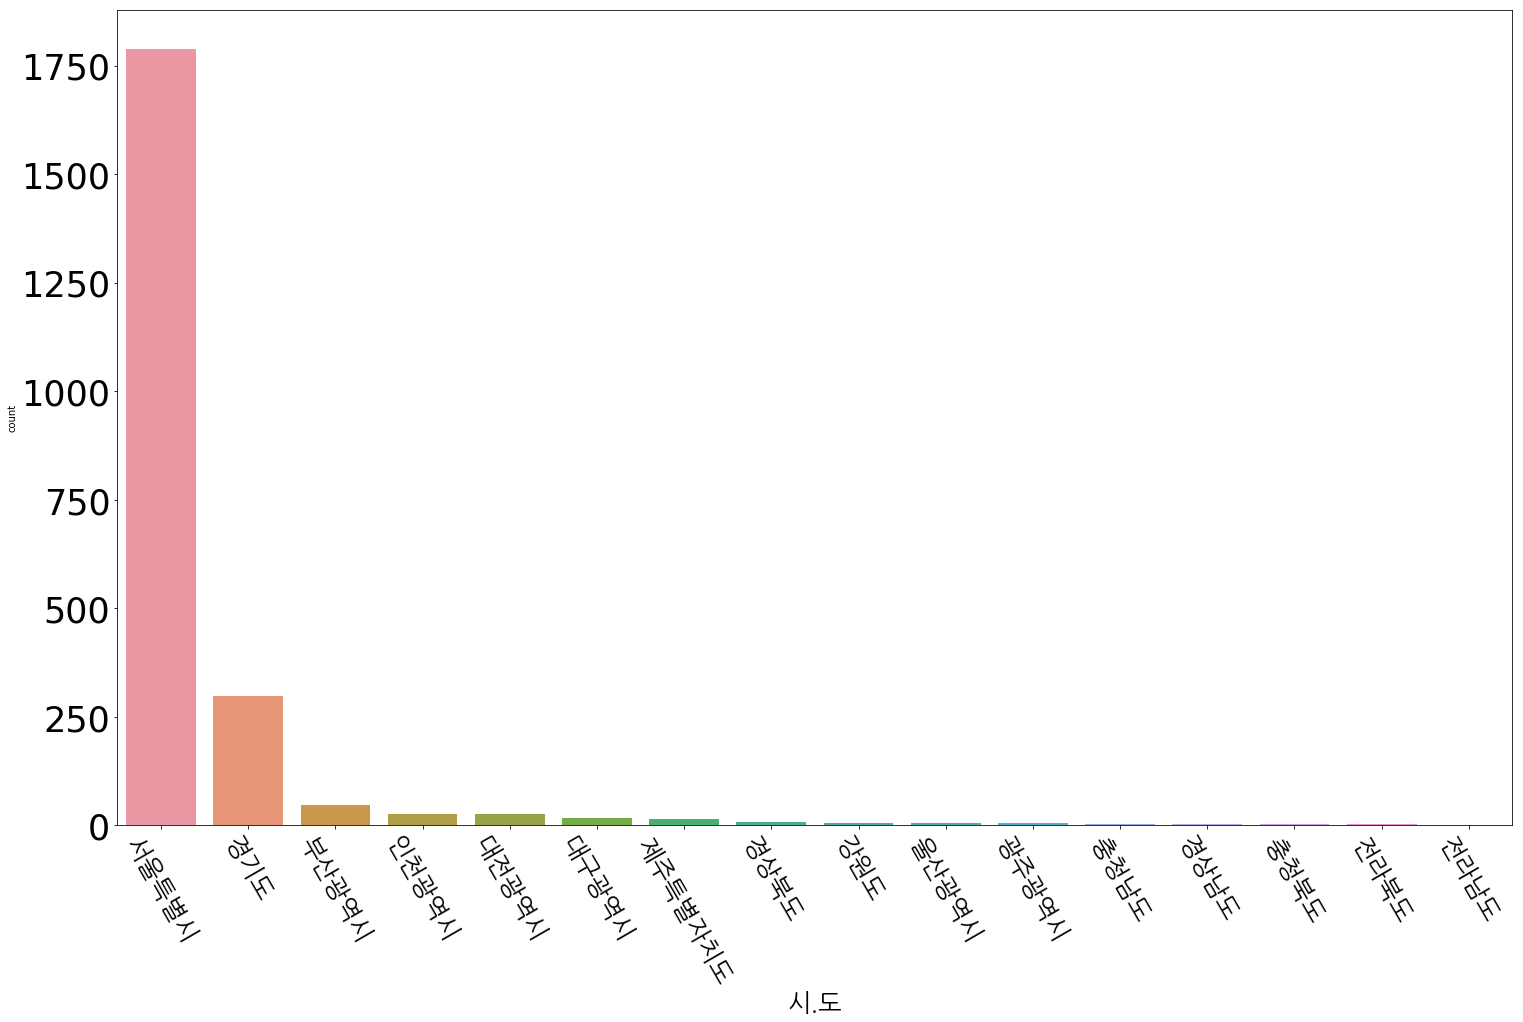

In [115]:
plt.figure(figsize=(25,15))
sns.countplot(df_cp.address_si, order= df_cp.address_si.value_counts().index)
plt.xticks(rotation = '300', fontproperties = fontprop)
plt.yticks(size = 35)
plt.xlabel("시.도",fontproperties = fontprop)
plt.show()

# 서울특별시 - 필터 없음

In [112]:
df_cp_seoul = df_cp[df_cp.address_si == '서울특별시']

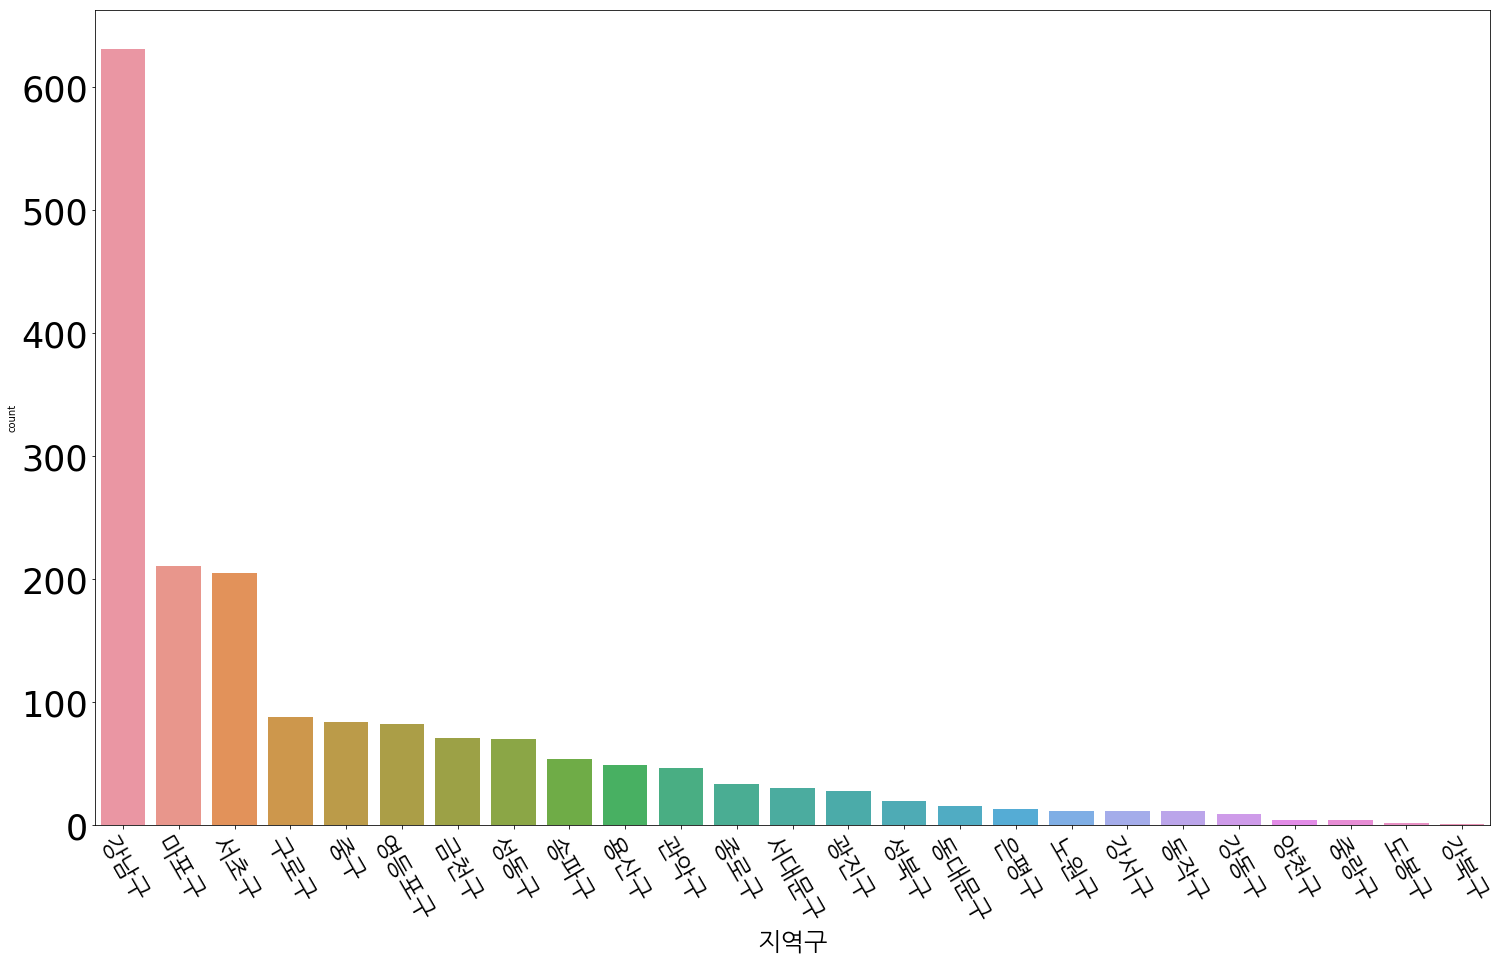

In [65]:
plt.figure(figsize=(25,15))
sns.countplot(df_cp_seoul.address_gu, order= df_cp_seoul.address_gu.value_counts().index)
plt.xticks(rotation = '300', fontproperties = fontprop)
plt.yticks(size = 35)
plt.xlabel("지역구",fontproperties = fontprop)
plt.show()

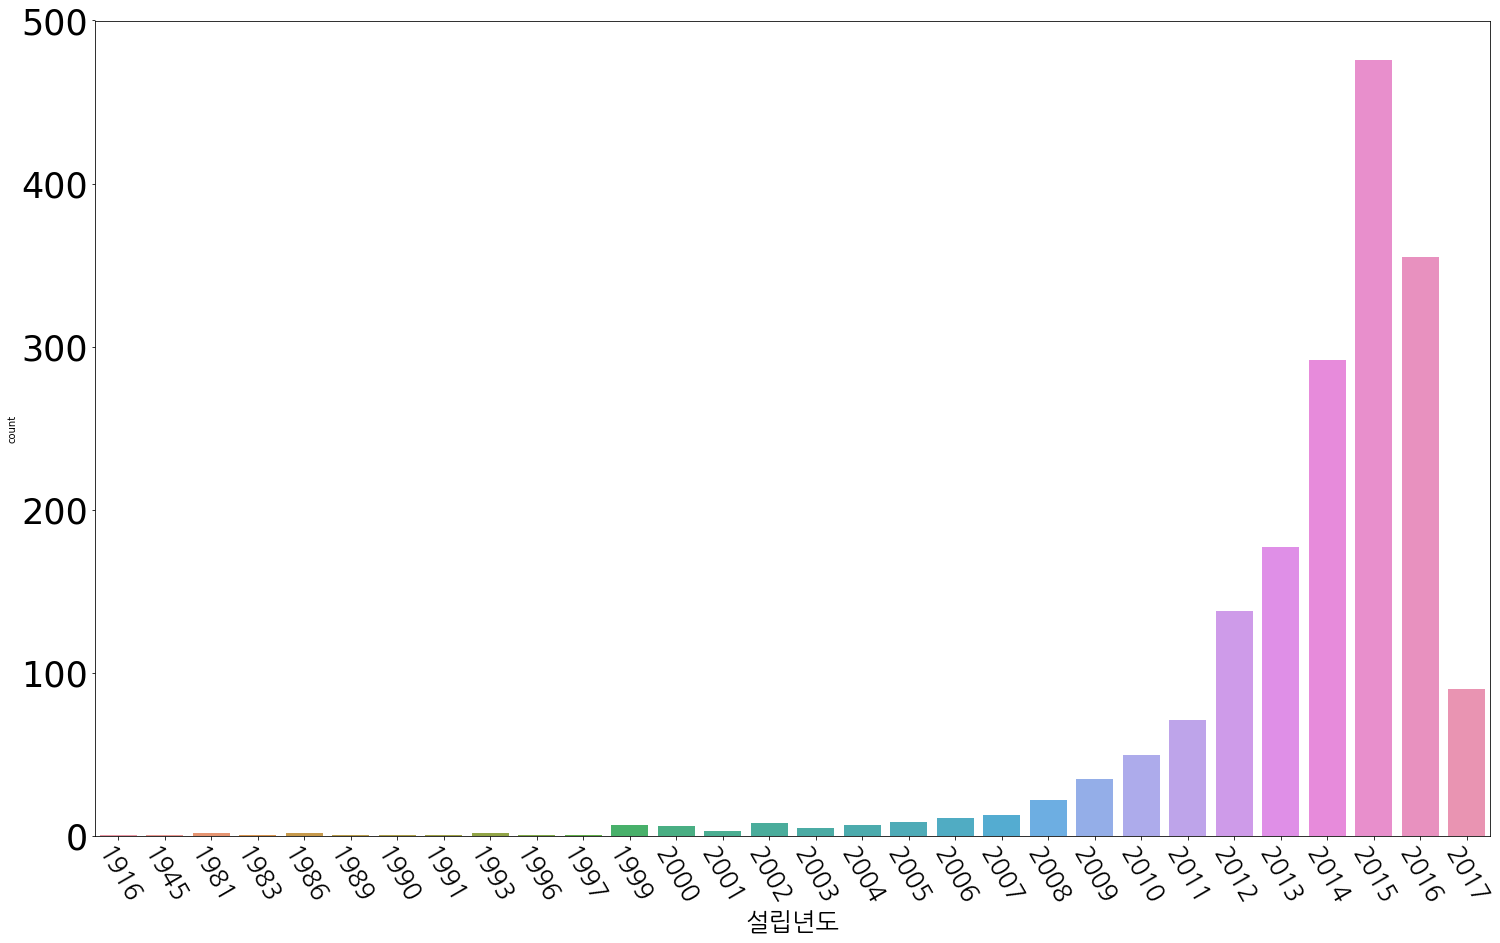

In [114]:
plt.figure(figsize=(25,15))
sns.countplot(df_cp_seoul.date_found_year)
plt.xticks(rotation = '300', fontproperties = fontprop)
plt.yticks(size = 35)
plt.xlabel("설립년도",fontproperties = fontprop)
plt.show()

In [104]:
map_osm = folium.Map(location=[37.566345, 126.977893], zoom_start=12)

In [105]:
for _ in range(len(df_cp_seoul.index)):
    data = df_cp_seoul.iloc[_]
    x_axis = data['axis_x']
    y_axis = data['axis_y']
    cp_name = data['name']
    folium.Marker([float(y_axis), float(x_axis)]).add_to(map_osm)
    print(cp_name)

'윌슨'프로젝트
(유)에스오피오오엔지
(주)
(주)GGumikun
(주)글로벌링커스
(주)금설
(주)나인피엑스
(주)네스트프렌즈
(주)누아
(주)더메인즈
(주)드림시스
(주)디멘터
(주)디엔티인터내셔널
(주)디트라이브
(주)레인핀테크
(주)렌트킹
(주)로보러스
(주)마루HR
(주)머스트잇
(주)몬스터즈랩
(주)뮤즈플랫폼
(주)미스터즈가라지
(주)바벨탑
(주)브레인콜라
(주)블랙플랜트
(주)블렌딩
(주)비주얼
(주)비즈인포소프트
(주)빅블루
(주)솔메딕스
(주)스타네이션
(주)스타일디
(주)시프티
(주)써니사이드게임즈
(주)써트온
(주)씨알에스큐브
(주)아임웹
(주)아임클라우드
(주)알마로꼬
(주)알케이웍스
(주)알파애널리틱스
(주)애드립
(주)애드업
(주)언팩
(주)에이브
(주)에이펠
(주)엔리프에듀케이션즈
(주)엘가플러스
(주)엠앤스마트
(주)오늘식탁
(주)오렌지씨큐리티
(주)오마이트립
(주)오브이엔
(주)윈드디자인
(주)윌림
(주)유니드컴즈
(주)윤아이디어랩
(주)이삼사
(주)이해라이프스타일
(주)인핏앤컴퍼니
(주)제이에프넷
(주)짐브러스
(주)집연구소
(주)취업뽀개기
(주)카유
(주)캐럿게임즈
(주)컨버전스소프트
(주)코어날리지네트웍스
(주)코이북스
(주)크리스앤파트너스
(주)토브소프트
(주)퍼시픽나인
(주)펀딩팩토리
(주)펀미유
(주)펌킨즈
(주)플러스베타
(주)플리팝
(주)플릭스
(주)핀샷
--
101컴퍼니
111%
12에디션
13마일
1moment
21그램
2s0
5민랩
61
8H
AOS
ASD코리아
Allbit
Ambitionem
BALKY
BLEXIT
BNV
Bike
C&L
CLO
CULTRIP
Cyclops
DREAMSEARCH
Divine925
Doongle
ED모바일
ERGO
EZ
FCE엔터테인먼트
FLESYM
G3
GAZESHOP
GamBridzy
Gameplete
Golden
HEADSHOT
HOONSTUDIO
HR컨설팅(주)
Hellena.Y
Heyon
INCUMATE
Inur
JobCV.me
K-ICT본투글로벌센터
KH리서치
Leve

칸유비크
캐럿게임즈
캐시멜로
캐주얼스텝스
캔고루
캠스콘
캡슐코퍼레이션
커넥션랩
커넥트온
커리어패스
커링
커머스랩
커무브
커뮤니크(주)
커뮤니티매핑센터
커피업
컨셉터스
컨크
컨텍스트디
컨텍스트로직코리아
컬러풀게임즈
컬츠
컴앤스테이
컴퍼니상상
컷앤컬
케어마인드
케이두
케이핏
코난그래픽스
코드마인드
코드스테이츠
코드앤
코드쿠
코리너스
코리아뉴스와이어
코리아부
코리아스타트업포럼
코리아에이치알그룹
코리아트래블이지
코미카엔터테인먼트
코스메틱벤처스
코스믹라떼
코스믹라이언
코스토리
코어스테이트
코우리
코인네스트
코지이지
코코네
코티비글로벌
콘버스
콘크릿
콘텐츠핫
콜론디
콤마랩
쿠다하
쿠츠
쿠킹메이트
쿠팡
쿤트리
쿨잼컴퍼니
퀄슨
퀵퀵
큐레이더
큐리어슬리
큐비트시큐리티(주)
큐피스트
크라픽
크레벅스
크레이티버
크루즈파
크리마(크리마팩토리,
크리메이커
크리스피스튜디오
크리에이트뉴컬쳐
크리에이트립
크리에이티브택시
크림컴퍼니
크몽
큰집
클래스베리
클래스팅
클래스프렙
클래스픽
클로버추얼패션
클로비
클리피오
클앱
키노빈스
키돕
키위소프트
키위트리
키핀
킥비디오
킴비서
킵스트레이트
타운컴퍼니
타이거컴퍼니
타이드스퀘어
타임캐스트
타임투박스
타임허브
타파스미디어
탈잉
탑시드
태그솔루션
태글
태피툰
탭진
탱커스
터치앤에듀
턴
텀블벅
테라펀딩
테스티드
테이스트로그
테이스트샵
테크트리스페이스
텐핑거스
토닥
토룩
토스랩
토이스미스
통계학술연구회
투데잇
투바앤
투블루
투비스마트
투비크로스
투어버킷
투어브랫
투지아
투투나인
투툼
튜터링
트래볼루션
트래블링아울
트래블포스트
트래블플랜
트래포트
트럼피아
트레드링스
트레이지
트렌드헌터
트롤게임즈
트루노스에쿼티파트너스
트리플넷
트리플에이치인터렉티브
트립비
트립얌
트립피츠
트릿지
티몬
티몬플러스
티벨
티브
티비스켓
티씨아시아
티앤아이씨
티엔디엔
티엔티크라우드
티엘엑스
티웨이브
티제이커뮤니케이션
티켓파운데이션
티티엘
티페이
티피앤글로벌
티피엠엔
티피올
틱스잇
팀그루브
팀버튼
팀이백이
파우스트
파우컴퍼니
파운트
파워피티
파이널컴퍼니
파이브락스
파인애플소프트
파인트리

In [108]:
map_osm.save('SEOUL_no_filter.html')

# 서울한정 _ 설립년도 5년차까지만 스타트업이라고 본다면...?

In [116]:
df_cp_seoul_until5 = df_cp_seoul[df_cp_seoul.date_found_year >= 2013] #5년차까지!

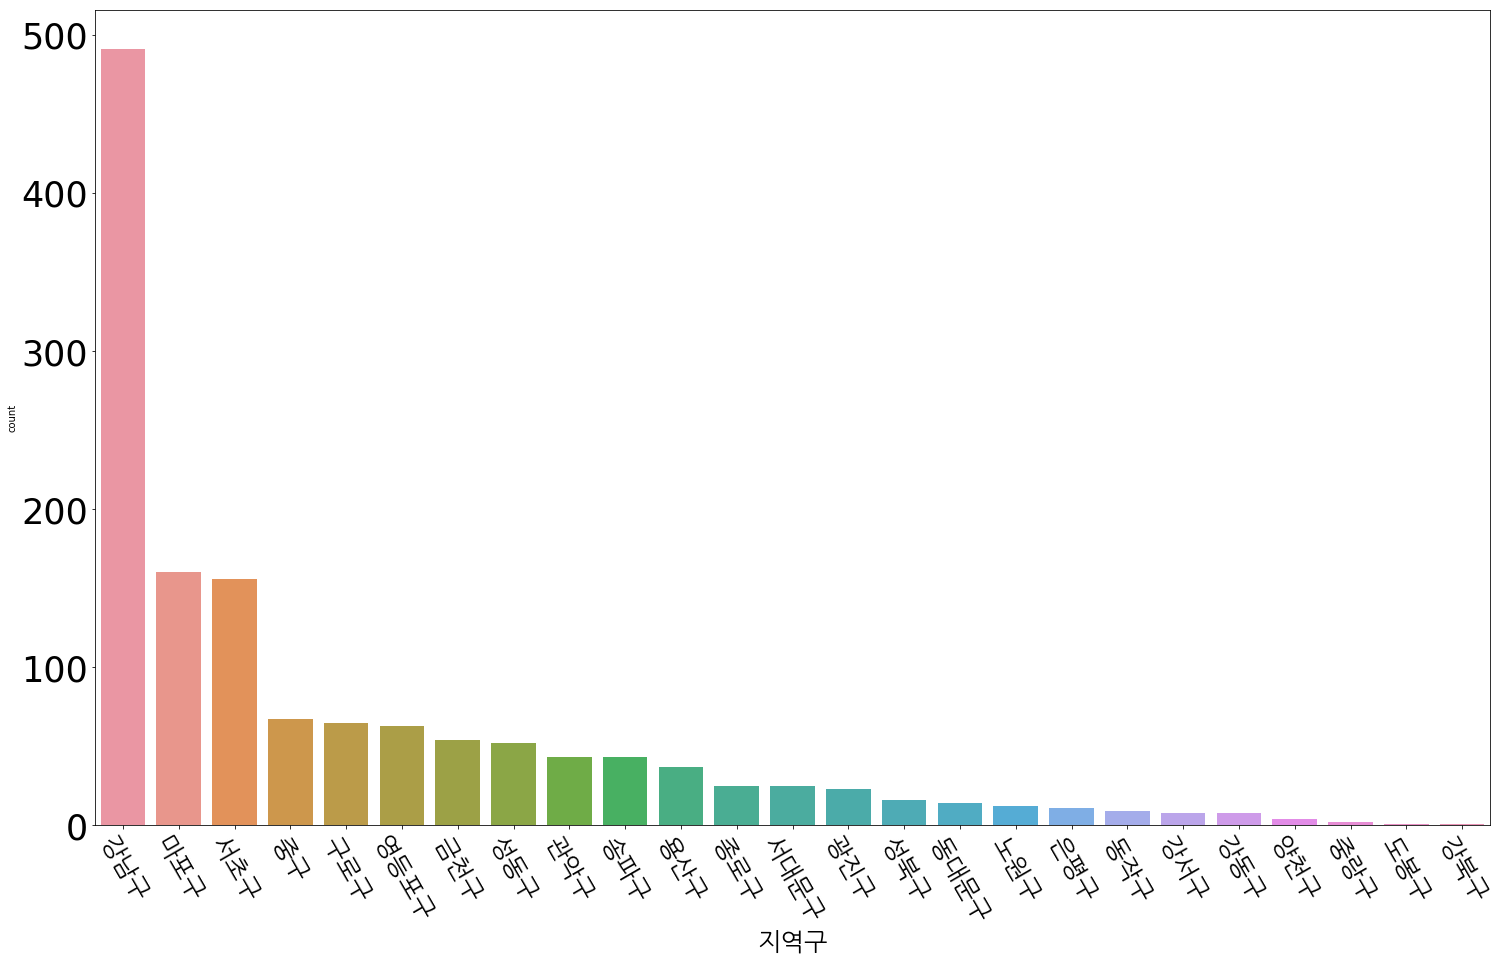

In [117]:
plt.figure(figsize=(25,15))
sns.countplot(df_cp_seoul_until5.address_gu, order= df_cp_seoul_until5.address_gu.value_counts().index)
plt.xticks(rotation = '300', fontproperties = fontprop)
plt.yticks(size = 35)
plt.xlabel("지역구",fontproperties = fontprop)
plt.show()

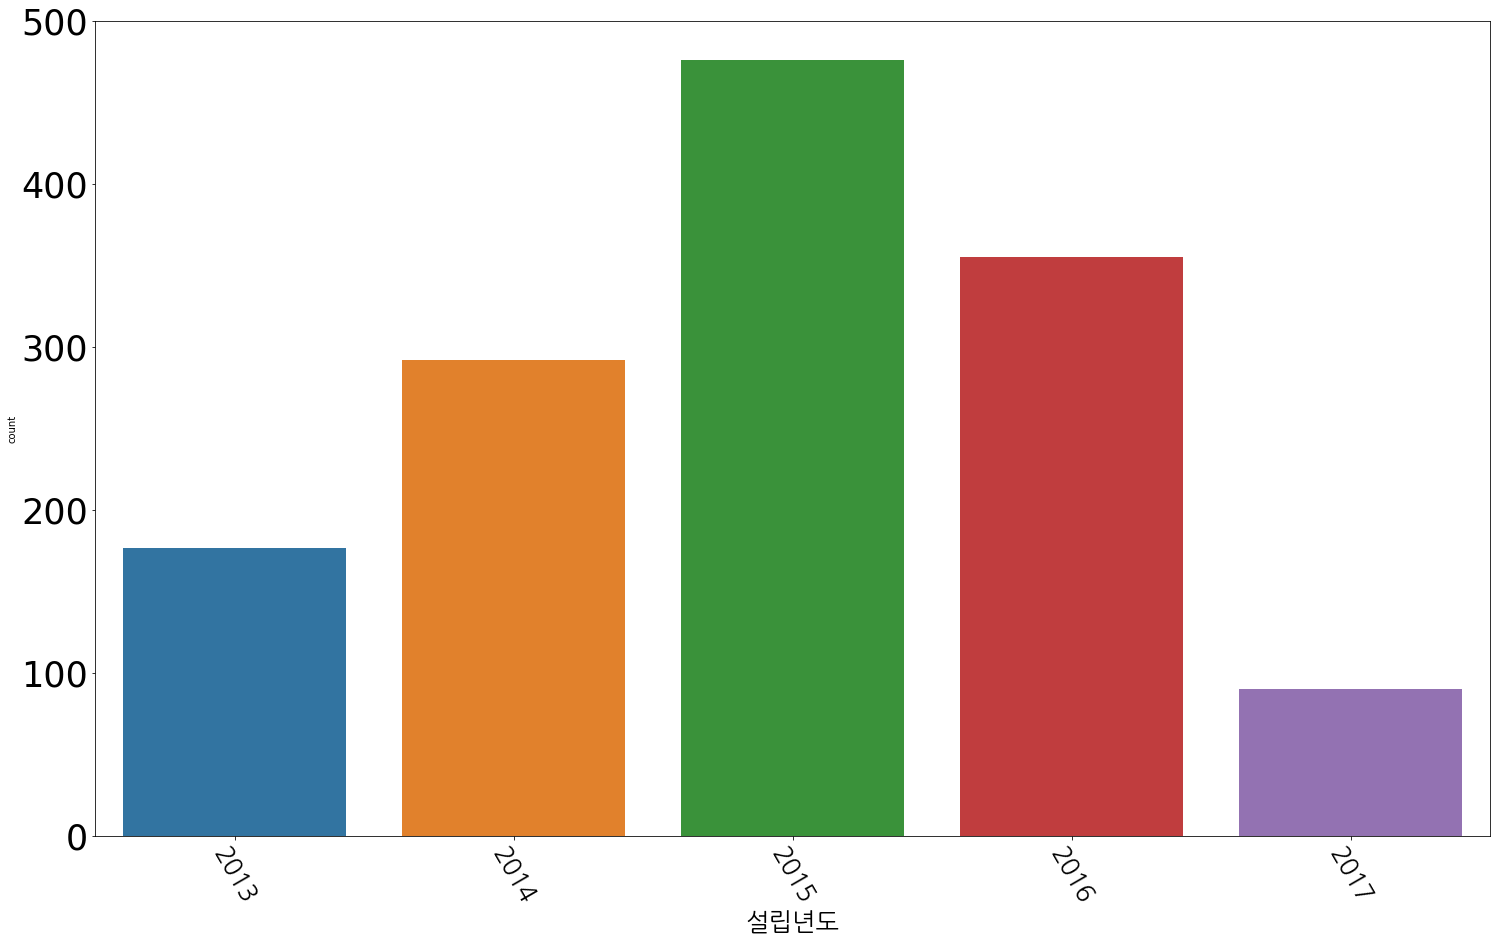

In [118]:
plt.figure(figsize=(25,15))
sns.countplot(df_cp_seoul_until5.date_found_year)
plt.xticks(rotation = '300', fontproperties = fontprop)
plt.yticks(size = 35)
plt.xlabel("설립년도",fontproperties = fontprop)
plt.show()

In [119]:
map_osm = folium.Map(location=[37.566345, 126.977893], zoom_start=12)
data_set = df_cp_seoul_until5.reset_index()
for _ in range(len(df_cp_seoul_until5.reset_index().index)):
    data = data_set.iloc[_]
    x_axis = data['axis_x']
    y_axis = data['axis_y']
    cp_name = data['name']
    folium.Marker([float(y_axis), float(x_axis)]).add_to(map_osm)
    print(cp_name)

'윌슨'프로젝트
(주)
(주)GGumikun
(주)글로벌링커스
(주)금설
(주)나인피엑스
(주)네스트프렌즈
(주)더메인즈
(주)디엔티인터내셔널
(주)레인핀테크
(주)렌트킹
(주)로보러스
(주)몬스터즈랩
(주)뮤즈플랫폼
(주)미스터즈가라지
(주)바벨탑
(주)브레인콜라
(주)블랙플랜트
(주)블렌딩
(주)비주얼
(주)비즈인포소프트
(주)빅블루
(주)솔메딕스
(주)시프티
(주)써니사이드게임즈
(주)써트온
(주)아임클라우드
(주)알마로꼬
(주)알케이웍스
(주)알파애널리틱스
(주)애드립
(주)애드업
(주)언팩
(주)에이펠
(주)엔리프에듀케이션즈
(주)엘가플러스
(주)엠앤스마트
(주)오늘식탁
(주)오렌지씨큐리티
(주)오마이트립
(주)오브이엔
(주)윈드디자인
(주)윌림
(주)유니드컴즈
(주)윤아이디어랩
(주)이삼사
(주)이해라이프스타일
(주)인핏앤컴퍼니
(주)제이에프넷
(주)짐브러스
(주)집연구소
(주)카유
(주)캐럿게임즈
(주)컨버전스소프트
(주)코이북스
(주)크리스앤파트너스
(주)토브소프트
(주)퍼시픽나인
(주)펀딩팩토리
(주)펀미유
(주)펌킨즈
(주)플러스베타
(주)플리팝
(주)플릭스
(주)핀샷
--
101컴퍼니
111%
12에디션
13마일
1moment
21그램
2s0
5민랩
61
8H
AOS
ASD코리아
Allbit
Ambitionem
BALKY
BLEXIT
BNV
Bike
C&L
CULTRIP
Cyclops
Divine925
Doongle
ED모바일
ERGO
EZ
FLESYM
G3
GamBridzy
Gameplete
Golden
HEADSHOT
Hellena.Y
Heyon
INCUMATE
Inur
JobCV.me
K-ICT본투글로벌센터
KH리서치
Level
Liahnson
MNLAB
MOTIFILM
MYTM
Matthews
MovingKey
NEX.T
NOONBiT
NPR
Plan2B
Punda
RCF
RJ
RedTie
S2
SAYHO
SENSIBLE
SK테크엑스
SL
SLOWHANDS
SL커뮤니케이션즈
SMARF
SOUS
SSenStone
Science
Sere

In [120]:
map_osm.save('SEOUL_until5_filter.html')